In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Countries List

In [2]:
# Countries we will analyze
countries_list = ["United States","Mexico","Venezuela","Brazil","South Africa","Nigeria","Poland","Sweden","China","South Korea"]


## Productivity/Working Hours

In [3]:
# Productivity dataframe
filepath = os.path.join("Output","productivity.csv")
productivity_df = pd.read_csv(filepath)

productivity_df = productivity_df[productivity_df.Entity.isin(countries_list)]
del productivity_df["Unnamed: 0"]
del productivity_df["Unnamed: 5"]
productivity_df = productivity_df.loc[(productivity_df[["Work hours per persons engaged","Productivity"]]!=0.00).any(axis=1)]
productivity_df

,Entity,Code,Year,Work hours per persons engaged,Productivity
70,Brazil,BRA,1950.0,2042.0000,2.018346
71,Brazil,BRA,1951.0,2051.0186,2.013669
72,Brazil,BRA,1952.0,2060.0771,2.157732
73,Brazil,BRA,1953.0,2069.1755,2.151867
74,Brazil,BRA,1954.0,2078.3142,2.262455
...,...,...,...,...,...
822,Venezuela,VEN,2002.0,1829.0203,9.460864
823,Venezuela,VEN,2003.0,1801.2109,9.292365
824,Venezuela,VEN,2004.0,1896.6949,10.846614
825,Venezuela,VEN,2005.0,1922.8501,13.346090


## Mental Health

In [4]:
#Creating Mental Health DF
filepath = os.path.join("Data","Mental_health","share_with_mental_and_substance_disorders.csv")
mental_health_df = pd.read_csv(filepath)
mental_health_df = mental_health_df.dropna(how='any')
mental_health_df = mental_health_df[mental_health_df.Entity.isin(countries_list)]
mental_health_df

,Entity,Code,Year,Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent) (%)
756,Brazil,BRA,1990,14.240272
757,Brazil,BRA,1991,14.222777
758,Brazil,BRA,1992,14.217471
759,Brazil,BRA,1993,14.221054
760,Brazil,BRA,1994,14.229710
...,...,...,...,...
6239,Venezuela,VEN,2013,11.105906
6240,Venezuela,VEN,2014,11.108576
6241,Venezuela,VEN,2015,11.112369
6242,Venezuela,VEN,2016,11.110904


## World Bank Health Systems

In [5]:
# Viewing World Bank Health Systems 
filepath = os.path.join("Data","Health_systems","World_Bank_health_systems.csv")
data_df = pd.read_csv(filepath)
data_df

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,US,Virgin Islands,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN
207,NaN,NaN,"Yemen, Rep.",5.6,10.2,81.0,72.0,144.5,7.8,0.3,0.7,0.8,30.7,NaN
208,Zambia,NaN,Zambia,4.5,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,NaN


## Cantril Happiness

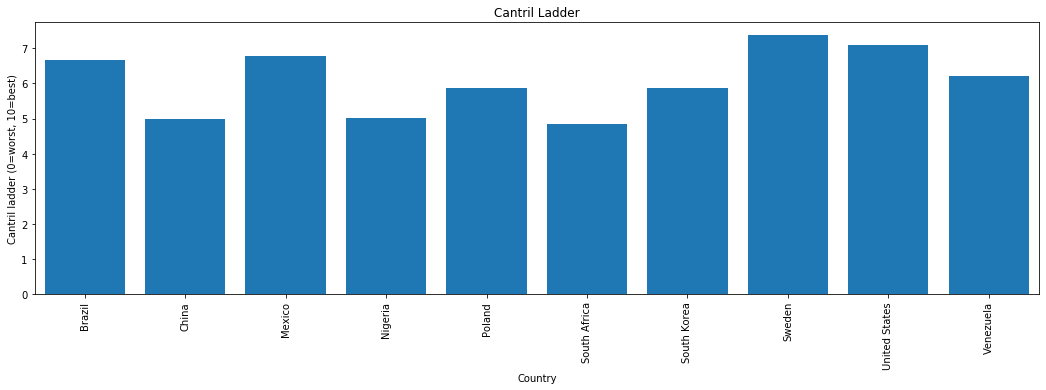

In [6]:
#Obtaining and visualizing Cantril Happiness score average per chosen country
filepath = os.path.join("Data","Life_satisfcation_and_happiness","happiness_cantril_ladder.csv")
Cantril_hap = pd.read_csv(filepath)
Cantril_hap  = Cantril_hap.rename(columns={"World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))":"Cantril Ladder(0=worst,10=best)"})

Cantril_hap = Cantril_hap[Cantril_hap.Entity.isin(countries_list)]
Cantril_hap_group = Cantril_hap.groupby("Entity").mean().reset_index()
Cantril_hap_group.count()


xlocation = [value for value in Cantril_hap_group["Entity"]]
f, ax = plt.subplots(figsize=(18,5))
plt.bar(Cantril_hap_group["Entity"],Cantril_hap_group["Cantril Ladder(0=worst,10=best)"])
plt.xticks(xlocation,Cantril_hap_group["Entity"],rotation=90)
plt.xlabel("Country")
plt.ylabel("Cantril ladder (0=worst, 10=best)")
plt.title("Cantril Ladder")
plt.xlim(-.5,len(Cantril_hap_group.Entity)-.5)
plt.show()


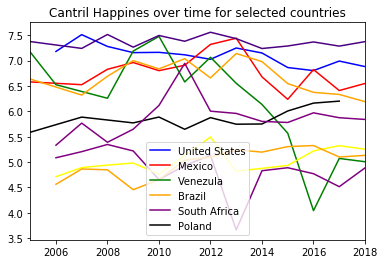

In [7]:
# Obtaining and visualizing Cantril Happiness score over time per chosen country
filepath = os.path.join("Data","Life_satisfcation_and_happiness","happiness_cantril_ladder.csv")
data_df = pd.read_csv(filepath)

data_df = data_df.rename(columns={"World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))":"Cantril Ladder(0=worst,10=best)"})
data_df = data_df[data_df.Entity.isin(countries_list)]
countries_list = [name for name in data_df.Entity.unique()]
years = data_df.Year

# Country data
US_data = data_df.loc[data_df.Entity == "United States"]
Mexico_data = data_df.loc[data_df.Entity == "Mexico"]
Venezuela_data = data_df.loc[data_df.Entity == "Venezuela"]
Brazil_data = data_df.loc[data_df.Entity == "Brazil"]
South_Africa_data = data_df.loc[data_df.Entity == "South Africa"]
Nigeria_data = data_df.loc[data_df.Entity == "Nigeria"]
Poland_data = data_df.loc[data_df.Entity == "Poland"]
Sweden_data = data_df.loc[data_df.Entity == "Sweden"]
China_data = data_df.loc[data_df.Entity == "China"]
South_Korea_data = data_df.loc[data_df.Entity == "South Korea"]

# Country lines
US_line, = plt.plot(US_data.Year, US_data["Cantril Ladder(0=worst,10=best)"], color="blue", label="United States")
Mexico_line, = plt.plot(Mexico_data.Year, Mexico_data["Cantril Ladder(0=worst,10=best)"], color="red", label="Mexico")
Venezuela_line, = plt.plot(Venezuela_data.Year, Venezuela_data["Cantril Ladder(0=worst,10=best)"], color="green", label="Venezula") 
Brazil_line, = plt.plot(Brazil_data.Year, Brazil_data["Cantril Ladder(0=worst,10=best)"], color="orange", label="Brazil") 
South_Africa_line, = plt.plot(South_Africa_data.Year, South_Africa_data["Cantril Ladder(0=worst,10=best)"], color="purple", label="South Africa") 
Nigeria_line, = plt.plot(Nigeria_data.Year, Nigeria_data["Cantril Ladder(0=worst,10=best)"], color="yellow", label="Nigeria") 
Poland_line, = plt.plot(Poland_data.Year, Poland_data["Cantril Ladder(0=worst,10=best)"], color="black", label="Poland") 
Sweden_line, = plt.plot(Sweden_data.Year, Sweden_data["Cantril Ladder(0=worst,10=best)"], color="indigo", label="Sweden") 
China_line, = plt.plot(China_data.Year, China_data["Cantril Ladder(0=worst,10=best)"], color="orange", label="China") 
South_Korea_line, = plt.plot(South_Korea_data.Year, South_Korea_data["Cantril Ladder(0=worst,10=best)"], color="purple", label="South Korea") 


plt.legend(handles=[US_line,Mexico_line,Venezuela_line,Brazil_line,South_Africa_line,Poland_line], loc="best")
plt.xlim(min(years),max(years))
plt.title("Cantril Happines over time for selected countries")
plt.show()


## Cantril Happiness and Productivity/Working Hours

In [8]:
merged_df = pd.merge(Cantril_hap,productivity_df)
merged_df

,Entity,Code,Year,"Cantril Ladder(0=worst,10=best)",Work hours per persons engaged,Productivity
0,Brazil,BRA,2005,6.636771,1783.1312,10.218953
1,Brazil,BRA,2007,6.320673,1781.6913,11.895355
2,Brazil,BRA,2008,6.691425,1784.6703,13.056262
3,Brazil,BRA,2009,7.000832,1779.3353,13.475542
4,Brazil,BRA,2010,6.837331,1779.5791,15.366799
...,...,...,...,...,...,...
98,United States,USA,2015,6.863947,1765.1826,64.563950
99,United States,USA,2016,6.803600,1760.7960,64.715569
100,United States,USA,2017,6.991759,1757.2255,65.512207
101,Venezuela,VEN,2005,7.169621,1922.8501,13.346090


Text(0, 0.5, 'Work hours per persons engaged')

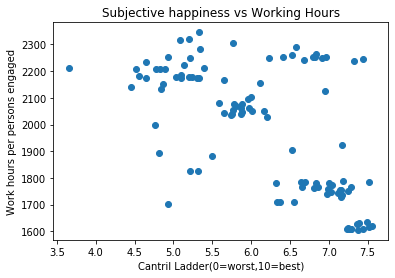

In [9]:
plt.scatter(merged_df["Cantril Ladder(0=worst,10=best)"],merged_df["Work hours per persons engaged"])
plt.title("Subjective happiness vs Working Hours")
plt.xlabel("Cantril Ladder(0=worst,10=best)")
plt.ylabel("Work hours per persons engaged")




In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearregression(x_values,y_values,x_label,y_label,x_annotate,y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,3)}x + {round(intercept,3)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(min(x_values)-2,max(x_values)+2)
    plt.ylim(min(y_values)-2,max(y_values)+2)
    plt.title(f'{x_label} vs. {y_label}')
    print(f"The r-squared is: {round(rvalue**2,2)}")
    print(line_eq)
    plt.show()

The r-squared is: 0.38
y = -0.003x + 11.165


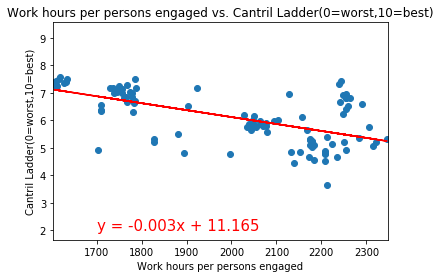

In [11]:
x_data = merged_df["Work hours per persons engaged"]
y_data = merged_df["Cantril Ladder(0=worst,10=best)"]
x_label = "Work hours per persons engaged"
y_label = "Cantril Ladder(0=worst,10=best)"


linearregression(x_data,y_data,x_label,y_label,1700,2)

## Mental Health and Productivity/Working Hours

In [12]:
mental_product_merged_df = pd.merge(mental_health_df,productivity_df)
mental_product_merged_df

,Entity,Code,Year,Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent) (%),Work hours per persons engaged,Productivity
0,Brazil,BRA,1990,14.240272,1879.0000,6.580704
1,Brazil,BRA,1991,14.222777,1868.4705,7.207055
2,Brazil,BRA,1992,14.217471,1858.0000,7.440670
3,Brazil,BRA,1993,14.221054,1858.9998,7.949526
4,Brazil,BRA,1994,14.229710,1860.0000,8.850357
...,...,...,...,...,...,...
230,Venezuela,VEN,2002,11.032860,1829.0203,9.460864
231,Venezuela,VEN,2003,11.024864,1801.2109,9.292365
232,Venezuela,VEN,2004,11.025445,1896.6949,10.846614
233,Venezuela,VEN,2005,11.025877,1922.8501,13.346090


The r-squared is: 0.51
y = -0.006x + 25.615


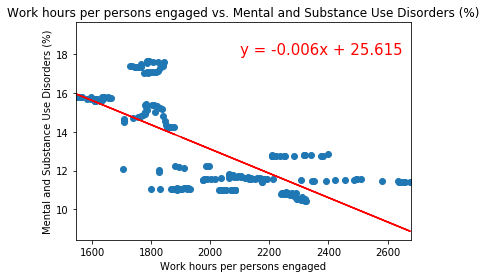

In [17]:
x_data = mental_product_merged_df["Work hours per persons engaged"]
y_data = mental_product_merged_df["Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent) (%)"]
x_label = "Work hours per persons engaged"
y_label = "Mental and Substance Use Disorders (%)"

linearregression(x_data,y_data,x_label,y_label,2100,18)